In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/tyco/Desktop/MADS/sanovo_19052025/data/processed/cleaned_data.csv')
df.head()

,MerId,MerType,MerDate,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority,MerDateDay
0,11897185,7,2025-01-30 10:22:00,10,22,181.0,180.0,90.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30
1,11897186,21,2025-01-30 10:21:42,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30
2,11897187,23,2025-01-30 10:21:56,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30
3,11897188,21,2025-01-30 10:21:56,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30
4,11897189,23,2025-01-30 10:21:57,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30


The lane related machine stops work in the following way: Machine stop merType 8 > reason for stop pressure control (96) lane 18 > reason for pressure control lane 18 is because of a lot of reroutes (98) > reason for the (98) are the lane stops > which are mostly 490,411,453,414,460,452 > mostly lane 12

I want to see the correlation between 98 and the machine stops. So an increase in 98 warnings means an increase in machine stops

In [12]:
df['MerDate'] = pd.to_datetime(df['MerDate'])
df_agg_15s = df.set_index('MerDate').resample('15S').apply(
    lambda x: pd.Series({
        'Total warnings 98': ((x['MerType'] == 22) & (x['MerNumber'] == 98)).sum(),
        'Total errors 96': ((x['MerType'] == 21) & (x['MerNumber'] == 96)).sum(),
        'Total errors 411': ((x['MerType'] == 21) & (x['MerNumber'] == 411)).sum(),
        'Total errors 414': ((x['MerType'] == 21) & (x['MerNumber'] == 414)).sum(),
        'Total errors 460': ((x['MerType'] == 21) & (x['MerNumber'] == 460)).sum(),
        'Total errors 456': ((x['MerType'] == 21) & (x['MerNumber'] == 456)).sum(),
        'Total errors 452': ((x['MerType'] == 21) & (x['MerNumber'] == 452)).sum(),
        'Total stops': ((x['MerType'] == 8) & (x['MerNumber'] == 0)).sum()
    })
).reset_index()

df_agg_15s.head()

/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_61749/2665158872.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_agg_15s = df.set_index('MerDate').resample('15S').apply(


,MerDate,Total warnings 98,Total errors 96,Total stops
0,2025-01-30 10:21:30,0,0,0
1,2025-01-30 10:21:45,0,0,0
2,2025-01-30 10:22:00,0,0,0
3,2025-01-30 10:22:15,1,0,0
4,2025-01-30 10:22:30,0,0,0


In [20]:
df_agg = df.groupby('MerDateDay').apply(
    lambda x: pd.Series({
        'Total errors 96': ((x['MerType'] == 21) & (x['MerNumber'] == 96)).sum(),
        'Total errors 411': ((x['MerType'] == 21) & (x['MerNumber'] == 411)).sum(),
        'Total errors 414': ((x['MerType'] == 21) & (x['MerNumber'] == 414)).sum(),
        'Total errors 460': ((x['MerType'] == 21) & (x['MerNumber'] == 460)).sum(),
        'Total errors 456': ((x['MerType'] == 21) & (x['MerNumber'] == 456)).sum(),
        'Total errors 452': ((x['MerType'] == 21) & (x['MerNumber'] == 452)).sum(),
        'Total stops': ((x['MerType'] == 8) & (x['MerNumber'] == 0)).sum()
    })
)

df_agg.head()

/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_61749/1867531329.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_agg = df.groupby('MerDateDay').apply(


,Total errors 96,Total errors 411,Total errors 414,Total errors 460,Total errors 456,Total errors 452,Total stops
MerDateDay,,,,,,,
2025-01-30,533,460,457,161,335,229,493
2025-01-31,351,376,331,248,214,240,312
2025-02-03,395,640,542,311,419,171,473
2025-02-04,413,658,543,334,458,297,393
2025-02-05,419,591,512,357,412,280,458


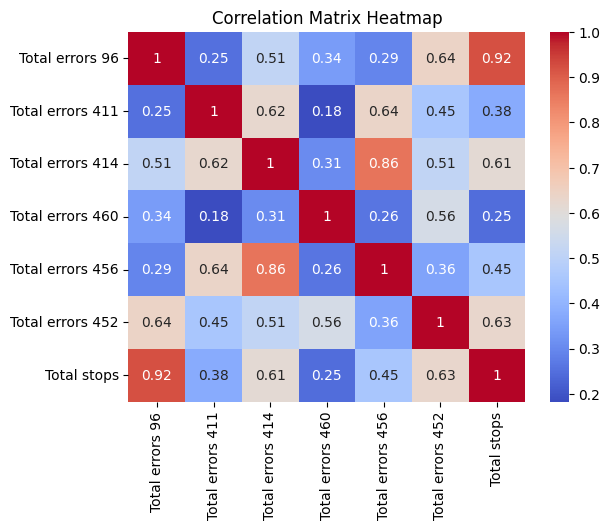

In [26]:
# df_agg.corr()['Total stops']
sns.heatmap(df_agg.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.savefig('most frequent error correlation.jpg')
plt.show()

In [16]:
df_agg.corr()['Total warnings 98']

Total warnings 98    1.000000
Total errors 96      0.362804
Total stops          0.342848
Name: Total warnings 98, dtype: float64

In [31]:
df_agg_warnings = df.groupby('MerDateDay').apply(
    lambda x: pd.Series({
        'Total warnings 98': ((x['MerType'] == 22) & (x['MerNumber'] == 98)).sum(),
        'Total warnings 127': ((x['MerType'] == 22) & (x['MerNumber'] == 127)).sum(),
        'Total warnings 92': ((x['MerType'] == 22) & (x['MerNumber'] == 92)).sum(),
        'Total warnings 106': ((x['MerType'] == 22) & (x['MerNumber'] == 106)).sum(),
        'Total warnings 146': ((x['MerType'] == 22) & (x['MerNumber'] == 146)).sum(),
        'Total warnings 72': ((x['MerType'] == 22) & (x['MerNumber'] == 72)).sum(),
        'Total stops': ((x['MerType'] == 8) & (x['MerNumber'] == 0)).sum()
    })
)

df_agg_warnings.head()

/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_61749/1584581367.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_agg_warnings = df.groupby('MerDateDay').apply(


,Total warnings 98,Total warnings 127,Total warnings 92,Total warnings 106,Total warnings 146,Total warnings 72,Total stops
MerDateDay,,,,,,,
2025-01-30,5737,0,25,0,96,24,493
2025-01-31,6693,0,45,55,53,14,312
2025-02-03,2245,0,61,131,68,29,473
2025-02-04,5632,0,85,95,0,35,393
2025-02-05,5235,0,57,77,0,19,458


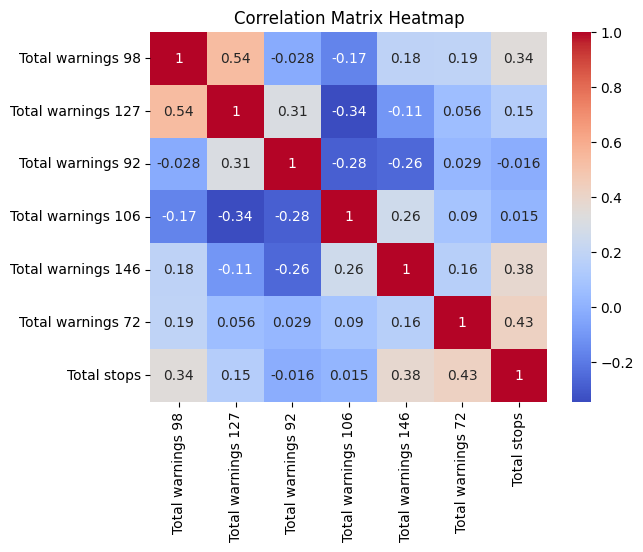

In [32]:
sns.heatmap(df_agg_warnings.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.savefig('most frequent error correlation.jpg')
plt.show()